# CREDITCARD DATASET - HANDLING IMBALANCEDDATASET

# Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
# IMPORT NECESSARY LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# READ THE DATASET

In [4]:
dataset=pd.read_csv('CreditcardFraudDetection.csv')

In [5]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
# create depedent and independent features
columns=dataset.columns.tolist()
# filter the columns to remove data we do not want
columns=[c for c in columns if c not in ["Class"]]
# store the varibles we are predicting
target="Class"
state=np.random.RandomState(29)
x=dataset[columns]
y=dataset[target]
x_outliers=state.uniform(low=0,high=1,size=(x.shape[0],x.shape[1]))
# print the shape of x and y
print(x.shape)
print(y.shape)

(284807, 30)
(284807,)


In [8]:
# EXPLOTARY DATA ANALYSIS

In [9]:
dataset.isnull().values.any()

False

In [10]:
# check the dataset is balanced or imbalanced

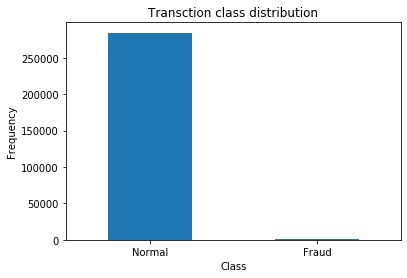

In [11]:
LABELS=["Normal","Fraud"]
count_classes=pd.value_counts(dataset['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("Transction class distribution")
plt.xticks(range(2),LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [12]:
# get the fraud and normal dataset

In [13]:
fraud=dataset[dataset['Class']==1]
normal=dataset[dataset['Class']==0]

In [14]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [15]:
# handling imbalnced dataset with undersampling and oversampling technique

In [16]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [17]:
# implementing smotetomek for imbalanced dataset

In [23]:
smotetotek=SMOTETomek()
x_res,y_res=smotetotek.fit_sample(x,y)

In [24]:
x_res.shape,y_res.shape

((567514, 30), (567514,))

In [25]:
from collections import Counter
print('Original dataset shape{}'.format(Counter(y)))
print('Resampled dataset shape{}'.format(Counter(y_res)))

Original dataset shapeCounter({0: 284315, 1: 492})
Resampled dataset shapeCounter({0: 283757, 1: 283757})


In [26]:
# Randomoversampler to handle imbalanced data

In [28]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
oversampling=RandomOverSampler()
xtrain_res,ytrain_res=oversampling.fit_sample(x,y)
xtrain_res.shape,ytrain_res.shape

((568630, 30), (568630,))

In [31]:
print('Original dataset shape{}'.format(Counter(y)))
print('Resampled dataset shape{}'.format(Counter(ytrain_res)))

Original dataset shapeCounter({0: 284315, 1: 492})
Resampled dataset shapeCounter({0: 284315, 1: 284315})


In [42]:
# In this example  i use SMOTETomek  which is a method of  imblearn. SMOTETomek is a hybrid method
# wchich uses an under sampling method(Tomek) and oversampling method (SMOKE) 

os_us=SMOTETomek()
xtrain2_res,ytrain2_res=os_us.fit_sample(x,y)
xtrain2_res.shape,ytrain2_res.shape

((567580, 30), (567580,))